In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline
!pip install WordCloud

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [17]:
#Read the dataset in csv
#data = pd.read_csv('./twitter-airline-sentiment/Tweets.csv', sep=',')
tweets = pd.read_csv('./twitter-airline-sentiment/Tweets.csv', sep=',')
#tweets.head(10)

In [3]:
#show the first 10 lines
#tweets.head(10)
#text.head(10)

In [18]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [19]:
# remove twitter handles (@user)
tweets['text'] = np.vectorize(remove_pattern)(tweets['text'], "@[\w]*")

In [20]:
# Removing Punctuations, Numbers, and Special Characters
# remove special characters, numbers, punctuations
tweets['text'] = tweets['text'].str.replace("[^a-zA-Z#]", " ")

In [21]:
# Removing Short Words

tweets['text'] = tweets['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,What said,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,plus added commercials experience tacky,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,didn today Must mean need take another trip,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,really aggressive blast obnoxious entertainmen...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,really thing about,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [22]:
# Tokenization

tokenized_tweet = tweets['text'].apply(lambda x: x.split())
tokenized_tweet.head()

0                                         [What, said]
1        [plus, added, commercials, experience, tacky]
2    [didn, today, Must, mean, need, take, another,...
3    [really, aggressive, blast, obnoxious, enterta...
4                               [really, thing, about]
Name: text, dtype: object

In [23]:
# Stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0                                         [what, said]
1                   [plu, ad, commerci, experi, tacki]
2    [didn, today, must, mean, need, take, anoth, t...
3    [realli, aggress, blast, obnoxi, entertain, yo...
4                               [realli, thing, about]
Name: text, dtype: object

In [24]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

tweets['text'] = tokenized_tweet

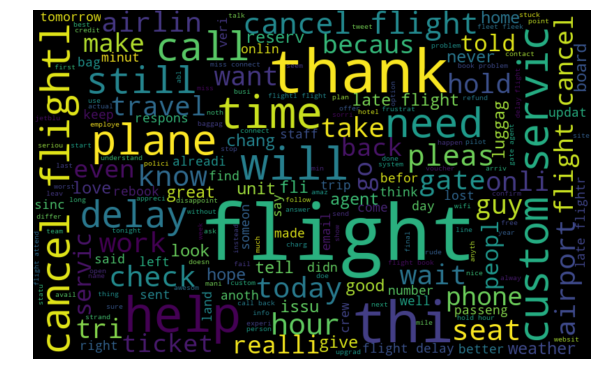

In [25]:
# Story Generation and Visualization from Tweets
# Understanding the common words used in the tweets: WordCloud

all_words = ' '.join([text for text in tweets['text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

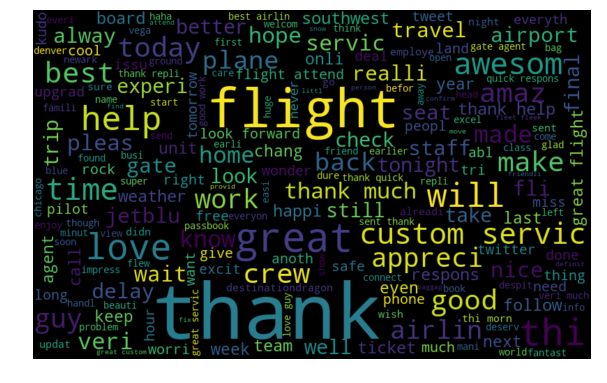

In [26]:
# Words in positive tweets

positive_words =' '.join([text for text in tweets['text'][tweets['airline_sentiment'] == 'positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


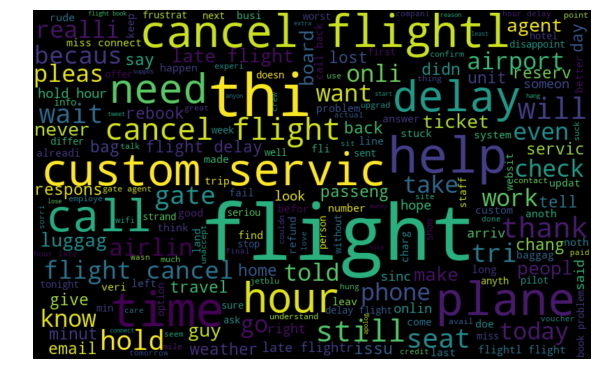

In [27]:
# Words in negative tweets

negative_words =' '.join([text for text in tweets['text'][tweets['airline_sentiment'] == 'negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [28]:
#Filter for the category
is_positive = tweets['airline_sentiment'].str.contains("positive")
is_negative = tweets['airline_sentiment'].str.contains("negative")
is_neutral = tweets['airline_sentiment'].str.contains("neutral")

In [29]:
positive_tweets = tweets[is_positive]
positive_tweets.shape

(2363, 15)

In [30]:
negative_tweets = tweets[is_negative]
negative_tweets.shape

(9178, 15)

In [31]:
neutral_tweets = tweets[is_neutral]
neutral_tweets.shape

(3099, 15)

In [32]:
worst_airline = negative_tweets[['airline','airline_sentiment_confidence','negativereason']]
worst_airline

,airline,airline_sentiment_confidence,negativereason
3,Virgin America,1.0000,Bad Flight
4,Virgin America,1.0000,Can't Tell
5,Virgin America,1.0000,Can't Tell
15,Virgin America,0.6842,Late Flight
17,Virgin America,1.0000,Bad Flight
20,Virgin America,0.6705,Can't Tell
24,Virgin America,1.0000,Customer Service Issue
25,Virgin America,1.0000,Customer Service Issue
26,Virgin America,1.0000,Can't Tell
28,Virgin America,1.0000,Bad Flight


In [33]:
# Create the rank for the worst airline
cnt_worst_airline = worst_airline.groupby('airline', as_index=False).count()
cnt_worst_airline.sort_values('negativereason', ascending=False)

,airline,airline_sentiment_confidence,negativereason
4,United,2633,2633
3,US Airways,2263,2263
0,American,1960,1960
2,Southwest,1186,1186
1,Delta,955,955
5,Virgin America,181,181


In [34]:
# Create the rank for the best airline
best_airline = positive_tweets[['airline','airline_sentiment_confidence']]
cnt_best_airline = best_airline.groupby('airline', as_index=False).count()
cnt_best_airline.sort_values('airline_sentiment_confidence', ascending=False)

,airline,airline_sentiment_confidence
2,Southwest,570
1,Delta,544
4,United,492
0,American,336
3,US Airways,269
5,Virgin America,152


In [35]:
# Create the rank for negative reason
motivation = negative_tweets[['airline','negativereason']]
cnt_bad_flight_motivation = motivation.groupby('negativereason', as_index=False).count()
cnt_bad_flight_motivation.sort_values('negativereason', ascending=False)

,negativereason,airline
9,longlines,178
8,Lost Luggage,724
7,Late Flight,1665
6,Flight Booking Problems,529
5,Flight Attendant Complaints,481
4,Damaged Luggage,74
3,Customer Service Issue,2910
2,Cancelled Flight,847
1,Can't Tell,1190
0,Bad Flight,580


In [36]:
# Understanding the impact of Hashtags on tweets sentiment

# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [37]:
# extracting hashtags from positive tweets

HT_positive = hashtag_extract(data['text'][data['airline_sentiment'] == 'positive'])

# extracting hashtags from negative tweets
HT_negative = hashtag_extract(data['text'][data['airline_sentiment'] == 'negative'])

# unnesting list
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])
#HT_positive
#HT_negative

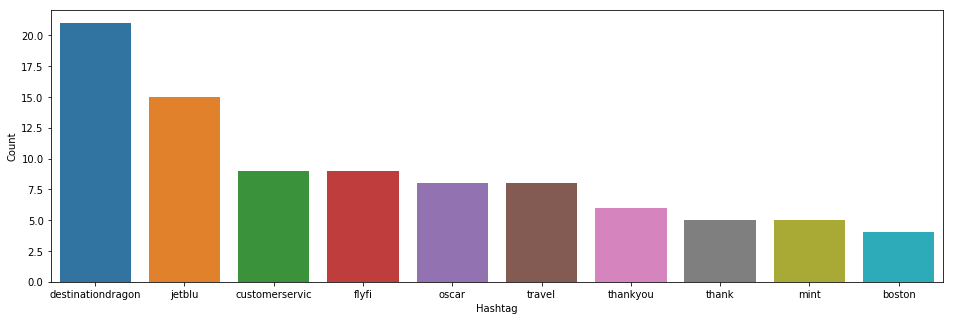

In [38]:
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

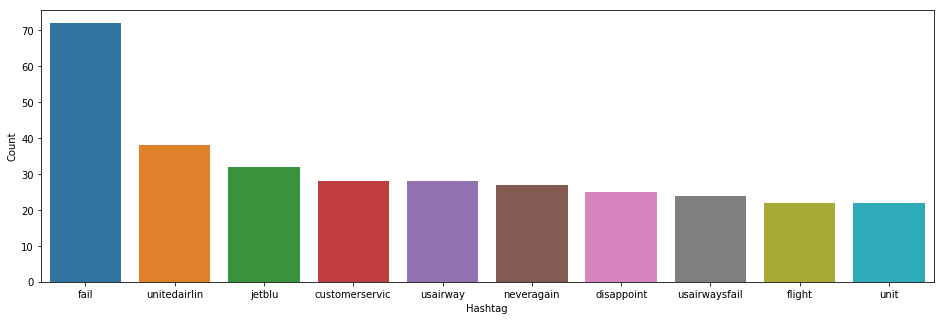

In [39]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [40]:
#Extracting Features from Cleaned Tweets

#Bag-of-Words Features

from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(data['text'])

<14640x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 83516 stored elements in Compressed Sparse Row format>

In [ ]:
# Building model using Bag-of-Words features

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:14640,:]
test_bow = bow[14640:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, tweets['text'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

In [ ]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['airline_sentiment'] = test_pred_int
submission = test[['tweet_id','airline_sentiment']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file